# Lab 2 - Interpretable Models

In this lab, we will venture through the simpler, interpretable, models Linear Regression and Decision Trees.
In part 1, linear regression will be applied to a housing dataset with houses for sale in California. The weights and the effect of the weights will be investigated to see how each feature affects the model and how using subset of features makes the models become more interpretable but at what cost of the predictive performance.

In part 2, decision trees will be created to model a car safety dataset, and we will investigate their performance and how interpretable they are, with the use of graphical aids such as **graphviz** and **dtreeviz**.

In the 3rd and final part, a Naive Bayes classifier is given to on a spam dataset. A Naive Bayes classifier operates naively by seeing each feature as independent and use their probabilities to determine its class. You are to investigate the model that is produced to try and explain what dictates the classification.

# Linear Regression
In this part of the lab, we train a linear regression model on a dataset containing housing prices from California. The target value is the price of the house.

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.datasets import fetch_california_housing


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [2]:
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'])

## Train the model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Inspect the model
Presenting the weights of each attribute in the model gives us an indication of the importance of the feature and its values.

In [4]:
df = pd.DataFrame()
df['Weight'] = np.append(lr.intercept_,lr.coef_)
df.index=['Intercept'] + data['feature_names']

df

,Weight
Intercept,-3.731761e+01
MedInc,4.462792e-01
HouseAge,9.660403e-03
AveRooms,-1.241195e-01
AveBedrms,8.290193e-01
Population,3.342789e-07
AveOccup,-8.098824e-03
Latitude,-4.209527e-01
Longitude,-4.363032e-01


Just to show the distribution of the data, we provide a boxplot below so you see the scale for each of the features.

[Text(0, 0.5, 'Features'), Text(0.5, 0, 'Weights')]

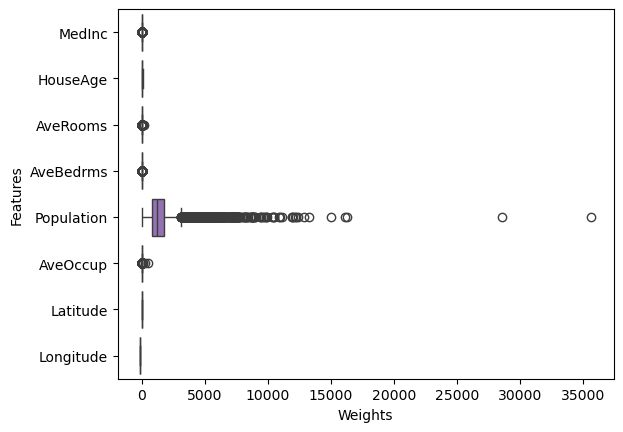

In [5]:
x_df = pd.DataFrame(X_train, columns=data['feature_names'])
sns.boxplot(data=x_df, orient='h').set(ylabel='Features', xlabel='Weights')

### Feature Effect

To visualize how each feature affects the prediction from the linear regression model we can look at the weights and its variance, but if we have a large difference in feature values it could be hard to interpret.

If we instead calculate the effect of each feature and visualize that, we get a better indication of how the features affect the predictions.

The effects of a feature on a single data instance is calculated as $$\text{effect}_{j}^{(i)}=w_{j}x_{j}^{(i)}$$
where $w_{j}$ is the weight of feature $j$, and $x_{j}^{(i)}$ is the value of feature $j$ in data instance $i$.

We visualize the effect using boxplots, which show the median values (the line inside the box), the 1st to 3rd quartiles (the actual boxes), and the outliers (the dots).

[Text(0.5, 1.0, 'Feature Effect'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'Effect')]

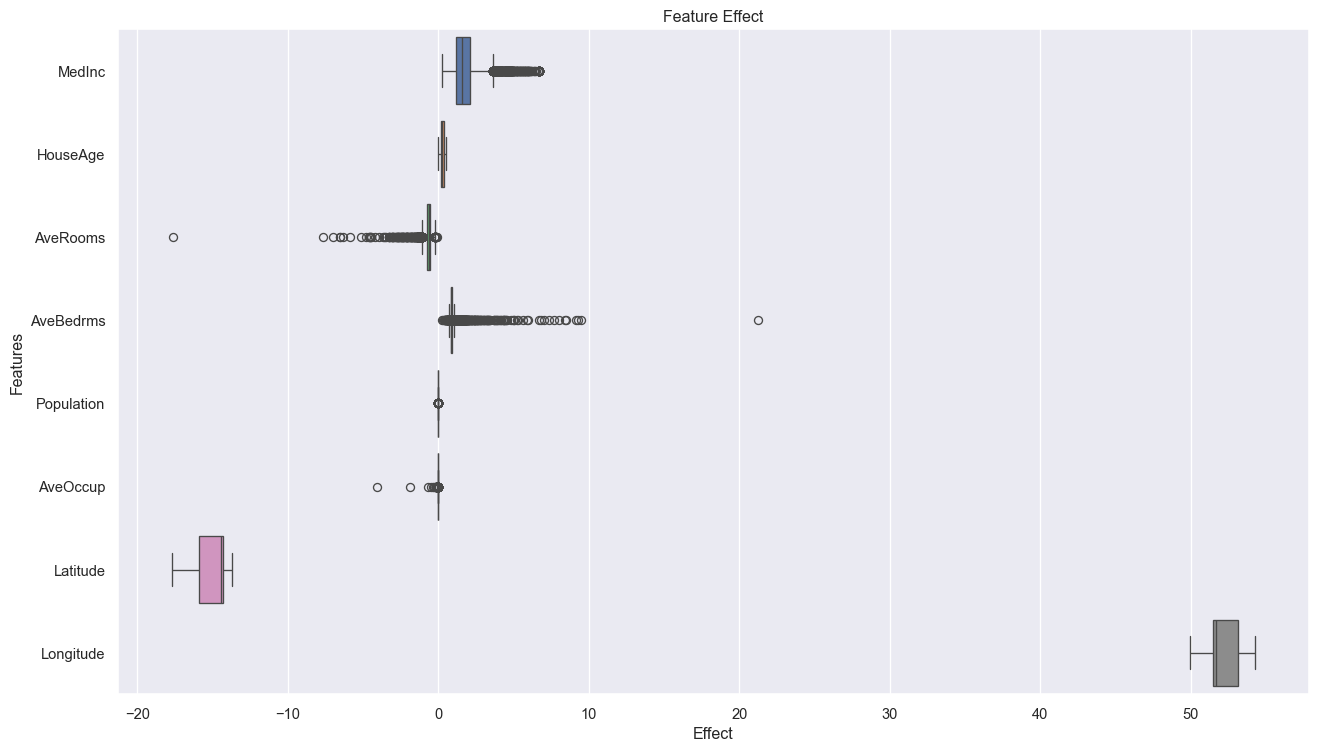

In [6]:
plt.rcParams['figure.figsize'] = [16, 9]
sns.set_theme(rc={"figure.dpi": 96})

weights = lr.coef_
effects = np.multiply(X_train, weights)

df = pd.DataFrame(effects, columns=data['feature_names'])
sns.boxplot(data=df, orient='h').set(title='Feature Effect', ylabel='Features', xlabel='Effect')

We can also show how the feature effects of single instances. This is a good indicator of the data, especially when it is plotted in combination with the effects of the entire model.

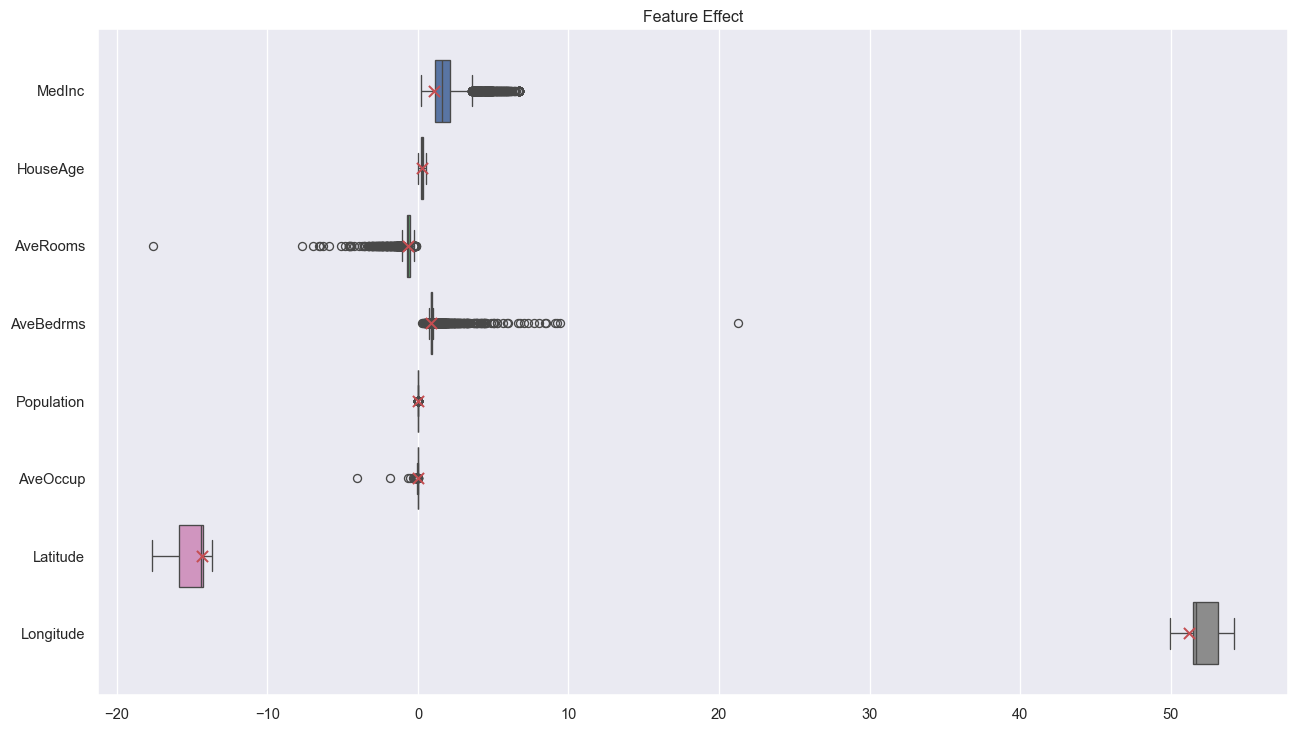

In [7]:
instance = np.multiply(X_train[10], weights)
fix, ax = plt.subplots(1,1)
plot = sns.boxplot(data=df, orient='h')
plot = plot.set_title('Feature Effect')
y_axis = [y for y in range(8)]

ax.scatter(instance, y_axis, marker='x', color='r', s=70, zorder=10)

What can you say about the results from the above plots? What does it mean if we compare the effect from the latitude and logitude features? What is their effect on the model?

In [ ]:
#It looks like the feature effect for latitude and longitude, so the area, has both variability and large value. 
#So they affect the price the most. Larger latitudes values contribute negatively to the price, and larger longitudes 
#contribute positively to the price(higher). I think that corresponds to houses being closer to the ocean and away from the city center? 

**Answer the question above here.**

### Lasso
The more features you have, the more you affect the complexity of the linear regression model. It is an interpretable model when we have a modest number of features. When we increase the amount of features the interpretability deteriorates. But, how do we decide which features to discard? 

Using a domain expert is often a good choice. Likewise, identifying which features that have the highest correlation with the target could be a way to go.

An automated approach called Lasso investigates which features provide the most for the model.

In this example below, we investigate which two features provides the better model using Lasso.

In [7]:
#from sklearn.feature_selection import SelectFromModel

# threshold=-np.inf forces Lasso to pick the number of features specified
#sel_ = SelectFromModel(LinearRegression(), threshold=-np.inf, max_features=2)
#sel_.fit(X_train, y_train)
#sel_.get_support()

#X_train_selected = sel_.transform(X_train)
#X_test_selected = sel_.transform(X_test)
#lr_selected = LinearRegression()
#lr_selected.fit(X_train_selected, y_train)
#y_pred = lr_selected.predict(X_train_selected)

Identify which models are better performing, by adapting the code from above, for each number of features ranging from 1 to 8 and store them for later use.

In [24]:
#Anywhere from 2 to 4 features, the performance of the model is greatly improved as shown BELOW 
#for the calculated test and train squareroot MSE.
#But from 2 to 3 features does not show improvement.

Evaluate the predictive performance of the chosen linear models on the data to see how they compare with each other.

Produce a plot which shows the root mean squared error for each of the chosen models, both on the training and testing data.

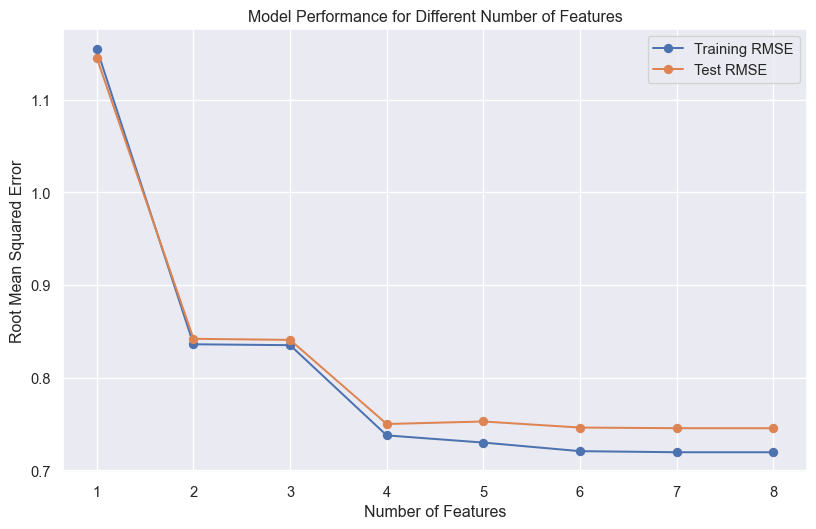

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fetch California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store models for later use
models = {}
X_train_selected_all = {}
X_test_selected_all = {}

for num_features in range(1, X.shape[1] + 1):
    # Select features using Lasso
    sel_ = SelectFromModel(LinearRegression(), threshold=-np.inf, max_features=num_features)
    sel_.fit(X_train, y_train)

    # Transform the data to select the chosen features
    X_train_selected = sel_.transform(X_train)
    X_test_selected = sel_.transform(X_test)

    X_train_selected_all[num_features] = X_train_selected
    X_test_selected_all[num_features] = X_test_selected

    # Fit linear regression model on the selected features
    lr_selected = LinearRegression()
    lr_selected.fit(X_train_selected, y_train)

    # Store the model
    models[num_features] = lr_selected

# Dictionary to store RMSE for each model
rmse_train = {}
rmse_test = {}

for num_features, model in models.items():
    X_train_selected = X_train_selected_all[num_features]
    X_test_selected = X_test_selected_all[num_features]

    # Predict on training and test set
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    # Calculate RMSE for training and test set
    rmse_train[num_features] = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test[num_features] = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Plot the RMSE for each model
plt.figure(figsize=(10, 6))
plt.plot(list(rmse_train.keys()), list(rmse_train.values()), marker='o', label='Training RMSE')
plt.plot(list(rmse_test.keys()), list(rmse_test.values()), marker='o', label='Test RMSE')
plt.title('Model Performance for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Root Mean Squared Error')
plt.xticks(range(1, X.shape[1] + 1))
plt.legend()
plt.grid(True)
plt.show()


Look at the feature effects on the different models and show how they differ between themselves.

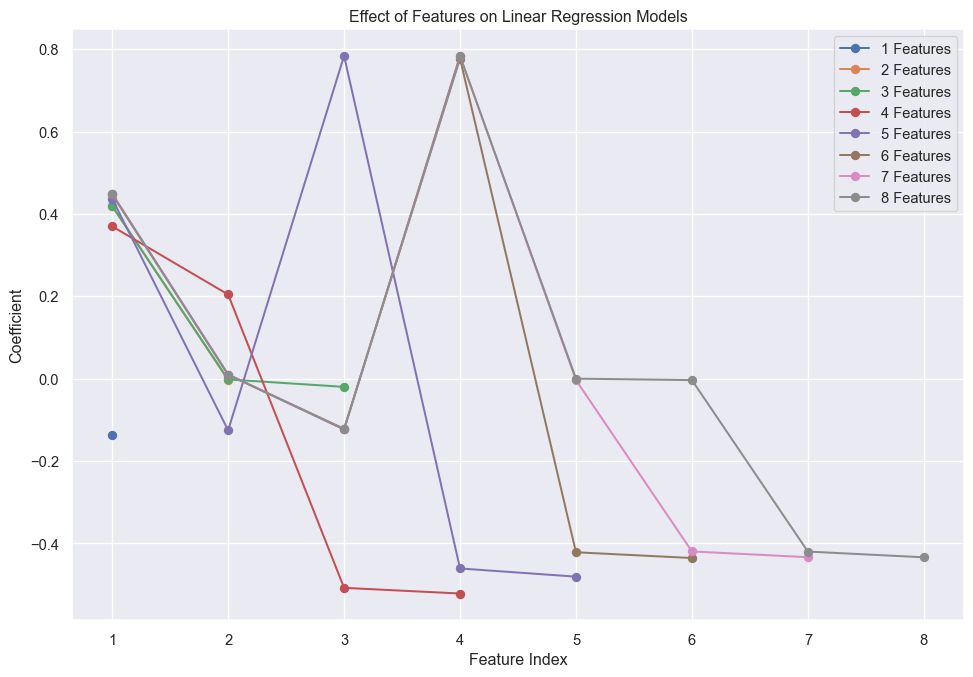

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Fetch California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store models and their coefficients for later use
models = {}
coefficients = {}

for num_features in range(1, X.shape[1] + 1):
    # Select features using Lasso
    sel_ = SelectFromModel(LinearRegression(), threshold=-np.inf, max_features=num_features)
    sel_.fit(X_train, y_train)

    # Transform the data to select the chosen features
    X_train_selected = sel_.transform(X_train)

    # Fit linear regression model on the selected features
    lr_selected = LinearRegression()
    lr_selected.fit(X_train_selected, y_train)

    # Store the model
    models[num_features] = lr_selected

    # Store the coefficients of the model
    coefficients[num_features] = lr_selected.coef_

# Plot the coefficients for each model
plt.figure(figsize=(12, 8))
for num_features, coef in coefficients.items():
    plt.plot(range(1, len(coef)+1), coef, marker='o', label=f'{num_features} Features')

plt.title('Effect of Features on Linear Regression Models')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.legend()
plt.grid(True)
plt.show()


Depending on the model and the number of features, the features themselves have different effect on the models. How did the features effect the models? Was there one feature that consistently had a significant effect or was there a combination that showed better predictive performances?

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Fetch California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store models and their coefficients for later use
models = {}
selected_features_table = {}

for num_features in range(1, X.shape[1] + 1):
    # Select features using Lasso
    sel_ = SelectFromModel(LinearRegression(), threshold=-np.inf, max_features=num_features)
    sel_.fit(X_train, y_train)

    # Get selected feature indices
    selected_indices = sel_.get_support(indices=True)

    # Get names of selected features
    selected_features = [data.feature_names[i] for i in selected_indices]

    # Transform the data to select the chosen features
    X_train_selected = sel_.transform(X_train)

    # Fit linear regression model on the selected features
    lr_selected = LinearRegression()
    lr_selected.fit(X_train_selected, y_train)

    # Store the model
    models[num_features] = lr_selected

    # Store the selected features for the current model
    selected_features_table[num_features] = selected_features

# Create a DataFrame to store the selected features for each model
feature_table = pd.DataFrame(selected_features_table.values(), index=selected_features_table.keys(), columns=[f'Feature_{i}' for i in range(1, X.shape[1] + 1)])

# Display the feature table
print("Feature Table:")
print(feature_table)


Feature Table:
   Feature_1  Feature_2  Feature_3  Feature_4   Feature_5  Feature_6  \
1  AveBedrms       None       None       None        None       None   
2     MedInc  AveBedrms       None       None        None       None   
3     MedInc  AveBedrms  Longitude       None        None       None   
4     MedInc  AveBedrms   Latitude  Longitude        None       None   
5     MedInc   AveRooms  AveBedrms   Latitude   Longitude       None   
6     MedInc   HouseAge   AveRooms  AveBedrms    Latitude  Longitude   
7     MedInc   HouseAge   AveRooms  AveBedrms    AveOccup   Latitude   
8     MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup   

   Feature_7  Feature_8  
1       None       None  
2       None       None  
3       None       None  
4       None       None  
5       None       None  
6       None       None  
7  Longitude       None  
8   Latitude  Longitude  


**answer above question here**

In [ ]:
#The value of the feature, for the different models can be seen waay above. More interestingly, we can see for each model
#what the most important features are, in the table right above. For example, when using one feature, 
#the best estimator is the number of bedrooms. But for two features: The median income jumps to the first place. 
#Then, Longitude is added in the third place. I find it interesting that the coefficient of the last feature is close to zero,
#regardless of the number of features. And of course that the value changes depending on the number of features taken into account
#(which makes sense too).

# Decision Trees
In this part we train a decision tree on a dataset that contains information about cars and their safety class.

## Load datasets

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/'
data_url = url + 'car.data'
columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(data_url, header=None)
df.columns = columns
ct = ColumnTransformer([('categorical', OrdinalEncoder(), df.columns)])
ct.fit(df)
df = ct.transform(df)
df = pd.DataFrame(df, columns=columns)

X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# dtreeviz does not like if the target class is not of int type, casting the targets to ints.
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Here we train the tree with a maximum depth of 4. Play around with the depth to see how the interpretability of the tree changes as the depth increases.

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_depth=3
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=tree_depth)

In [14]:
gini_tree.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=3)

To show how the tree is built and how data is divided at each leaf, we can use both graphviz and dtreeviz to visualize the produced rules. It is an easier and more pleasant view of the tree model compared to written rules.

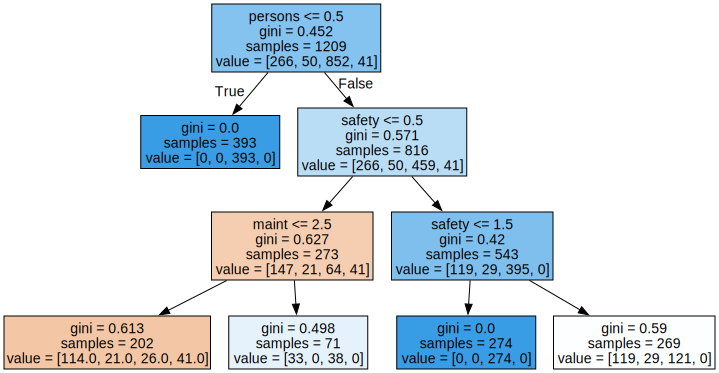

In [15]:
from sklearn import tree
import graphviz

g = tree.export_graphviz(gini_tree, 
                         feature_names=X_train.columns.tolist(),
                         filled=True)
graphviz.Source(g)

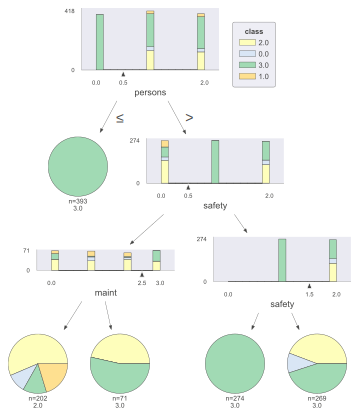

In [16]:
import dtreeviz

viz = dtreeviz.model(gini_tree, X_train, y_train, 
                     target_name='class', 
                     feature_names=X_train.columns.tolist(), 
                     class_names=df['class'].unique().tolist())
viz.view()


As we increase the heigt of the tree it is commonly so that the predictive performance increases, but it overfits quite quickly when you do that. 

Taking both interpretability into account and the predictive performance of the model, at which tree height did you find to strike a good balance?

**answer above question here**

In [ ]:
#I think at depth 4 it had decent purity in the leaves, but honestly at depth 2 it seemed more explainable. Not a nice tree.

# Naive Bayes Classifier
In this part of the lab we will produce a Naive Bayes model on a spam dataset. The model should then be used to determine if the message is regarded as spam (malicious) or ham (benevolent).

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# Dataset downloaded from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
spam_df = pd.read_csv('SMSSpamCollection.csv')
spam_df['spam'].value_counts()

spam
0    4827
1     747
Name: count, dtype: int64

In [7]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(spam_df['text'])
X_train, X_test, y_train, y_test = train_test_split(X, spam_df['spam'], test_size=0.3, random_state=42)


In [8]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9772863120143455

Identify 10 words that you want to investigate. The words are available in the list below when you run the cell.

In [9]:
cv.vocabulary_

{'jurong': 4248,
 'point': 5779,
 'crazy': 2282,
 'available': 1284,
 'bugis': 1719,
 'great': 3555,
 'world': 8285,
 'la': 4374,
 'buffet': 1717,
 'cine': 2007,
 'got': 3515,
 'amore': 1064,
 'wat': 8083,
 'ok': 5377,
 'lar': 4410,
 'joking': 4216,
 'wif': 8191,
 'oni': 5403,
 'free': 3280,
 'entry': 2889,
 'wkly': 8243,
 'comp': 2123,
 'win': 8203,
 'fa': 3018,
 'cup': 2341,
 'final': 3135,
 'tkts': 7569,
 '21st': 412,
 '2005': 403,
 'text': 7437,
 '87121': 794,
 'receive': 6158,
 'question': 6052,
 'std': 7077,
 'txt': 7754,
 'rate': 6104,
 'apply': 1141,
 '08452810075over18': 77,
 'dun': 2751,
 'say': 6496,
 'early': 2770,
 'hor': 3840,
 'nah': 5124,
 'don': 2663,
 'think': 7492,
 'goes': 3479,
 'usf': 7892,
 'lives': 4562,
 'freemsg': 3287,
 'hey': 3757,
 'darling': 2398,
 'week': 8129,
 'word': 8276,
 'like': 4512,
 'fun': 3342,
 'tb': 7372,
 'xxx': 8350,
 'chgs': 1961,
 'send': 6584,
 '50': 616,
 'rcv': 6116,
 'brother': 1689,
 'speak': 6959,
 'treat': 7687,
 'aids': 997,
 'pate

In [16]:
# Todo by student
# Select 10 words to investigate
sample = ['great', 'amore', 'free', 'early', 'think', 'hey', 'xxx', 'brother', 'treat', 'aids']
probabilities = []

Gather the individual probabilities for the 10 words you have chosen and explain how they impact the model. In the cell below we identify the mapping of the word hello and gather its probability in the form \[ham, spam\].

In [17]:
a = cv.transform(['Hello'])
nb.predict_proba(a)

array([[0.97702598, 0.02297402]])

In [18]:
# Vectorize words, calculate probabilities
sample2 = cv.transform(sample)
probabilities = nb.predict_proba(sample2)

# Print the probabilities
for word, prob in zip(sample, probabilities):
    print(f"Word: {word}, Probability: {prob}")

Word: great, Probability: [0.96355652 0.03644348]
Word: amore, Probability: [0.87037997 0.12962003]
Word: free, Probability: [0.47904471 0.52095529]
Word: early, Probability: [0.98822639 0.01177361]
Word: think, Probability: [0.9883416 0.0116584]
Word: hey, Probability: [0.98372229 0.01627771]
Word: xxx, Probability: [0.88181 0.11819]
Word: brother, Probability: [0.95918701 0.04081299]
Word: treat, Probability: [0.97760186 0.02239814]
Word: aids, Probability: [0.87037997 0.12962003]


**Explain the words impact on the model based on the probabilities above**

In [19]:
#The probabilities shown are that of each word being present in a ham or spam message.
#But to make a prediction on a message, their probabilities lets say are multiplied. Whichever probability is higher, it determines the 
#classification of the message. The prediction is, in a sense, proportional to the probability of each word. Here most words appear to be ham.
#The exception being "free", which is ambiguous, and then less so but also amore and xxx.

Gather the 10 words that most indicate it to be a spam email and the 10 words that mostly indicate for not being spam. Do they make sense?

In [20]:
# Get the feature names (words) from the CountVectorizer
feature_names = np.array(cv.get_feature_names_out())

# Get the log probabilities from the trained Naive Bayes classifier
log_probabilities = nb.feature_log_prob_

# Get the index of the sorted log probabilities for each class
spam_indices = np.argsort(log_probabilities[1])[::-1]  # Sorting in descending order for spam class
ham_indices = np.argsort(log_probabilities[0])[::-1]   # Sorting in descending order for ham class

# Get the top 10 words for spam and ham classes
top_spam_words = feature_names[spam_indices[:10]]
top_ham_words = feature_names[ham_indices[:10]]

print("Top 10 words indicating spam:")
print(top_spam_words)

print("\nTop 10 words indicating ham:")
print(top_ham_words)

Top 10 words indicating spam:
['free' 'txt' 'ur' 'mobile' 'text' 'stop' 'claim' 'reply' 'www' 'prize']

Top 10 words indicating ham:
['gt' 'lt' 'ok' 'just' 'll' 'ur' 'good' 'got' 'know' 'love']


In [24]:
#They make some sense. gt (get?) is most commonly present in legitimate messages. And free is very common in spam messages. 
#But actually the whole message should be taken into account, because it is the combination of words that determines the result.
#The model will make a prediction on a message by factoring in the probabilities of each word inside it. Free is present in non spam 
#messages also. 

#As an example the sample would be:

message = ' '.join(sample)
# Vectorize the message using the CountVectorizer
message_vectorized = cv.transform([message])

# Get the probabilities of the message being ham or spam using the trained Naive Bayes classifier
probabilities = nb.predict_proba(message_vectorized)
print("Probability of the message being ham (non-spam):", probabilities[0][0])
print("Probability of the message being spam:", probabilities[0][1])

#Message is ham!

Probability of the message being ham (non-spam): 0.9999943576716835
Probability of the message being spam: 5.642328310946595e-06


# Final reflection
What have you learned throughout this lab? This includes but is not limited to the example points below.

- Are the models that we presented interpretable under any condition? 

- Would, for instance, the predictions from decision tree with 1000 levels be easy to decipher? 

- Would a linear regression model with 123456 attributes be interpretable?

Reason and reflect about the interpretable models.

#The linear regression and decision tree classification were nicely complemented by the XAI. With the number of features being very large in the vocabulary, it is hard to say how each word affects the result. This could be affected by the length of the message for example.

#I should scale the data to determine feature effect etc. That way the effects are comparable.
#For example:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

Decision trees are inherently interpretable due to their hierarchical structure. However, as the depth of the tree increases, the interpretability decreases. For example, a decision tree that is even 10 levels deep would not be interpretable to us, cannot be conveyed logically to a person and would not have much meaning, but probably gets good purity in the leaf node.
Linear regression models are also interpretable because they provide insight into the relationship between the independent variables and the dependent variable. However, heavy assumptions are made when interpreting the data, for example that the variables are not related to each other. Additionally when it comes to interpretation, a linear regression model with an excessive number of features and variation in weights, would be challenging to interpret adequately and with any logical meaning. Therefore reducing the number of features is helpful to produce a less accurate but more interpretable model. This is also why sparse solutions are valuable.